# **Chapter2** (2.3) 統計入門

***

## (2.3.2) 不偏性、有効性、一致性

In [1]:
import numpy as np

確率変数 x は正規分布（平均50, 標準偏差30）に従ってランダムに発生する</br>
⇒でも現実には x がどんな分布から発生しているかは分からないので、データから分布を推定したい

x の実現値として10個のデータ点が観測されたデータ（標本、サンプル）をXとする

In [2]:
X = np.random.normal(50, 30, 10)
X

array([21.22649281, 97.96649137, 24.63587376, 71.37165161, 24.14400776,
       44.42787689, 26.43511141,  4.83255592, 73.71141528,  0.27950329])

</br>

Xを用いてxが従う分布の母平均muを推定したい</br>
0. **適切な推定量**として、直感的には**算術平均**が考えられる

In [3]:
mu_hat0 = np.mean(X)
print(f"mu_hat0: {mu_hat0}")

mu_hat0: 38.90309801011666


</br>

**推定量**としては、他にどんなものが考えられるか？</br>
1. Xの要素 **x0** （母平均muの分布からの実現値）</br>
2. **x1とx2の平均**（データ点の数に関わらず、2つのデータ点を平均）

In [4]:
print(f"mu_hat1: {X[0]}")
print(f"mu_hat2: {(X[1]+X[2])/2}")

mu_hat1: 21.226492811708138
mu_hat2: 61.30118256075913


</br>

**推定量0～2**の中で、一番良い推定量はどれか？</br>
**不偏性**、**有効性**、**一致性**の観点から判断していく

</br>

### 不偏性

**推定量は確率変数**</br>
推定量の実現値＝パラメータの推定値（ここでは分布の母平均の推定値）は、データXが与えられて初めて計算できる</br>
（Xの中身が変われば、推定値も変化する）</br>
推定量は確率変数なので、推定量にも分布がある（期待値とか分散を計算できる）</br>
</br>
Xが繰り返し取得可能だとすれば（現実世界ではデータを何回も取得というのは考えにくいが）、推定量もその度に取得（計算）できるイメージ

**不偏性**</br>
*E(θ) = θ* *</br>
（「期待値が真の値に一致する」推定量を、不偏推定量と呼ぶ）

In [5]:
import matplotlib.pyplot as plt

In [6]:
mu = 50
dev = 30
N = 10
rep = 10000

In [7]:
theta_lists = [[] for i in range(3)]
for i in range(rep):
    X = np.random.normal(mu, dev, N)
    theta_lists[0].append(np.mean(X))
    theta_lists[1].append(X[0])
    theta_lists[2].append((X[1]+X[2])/2)

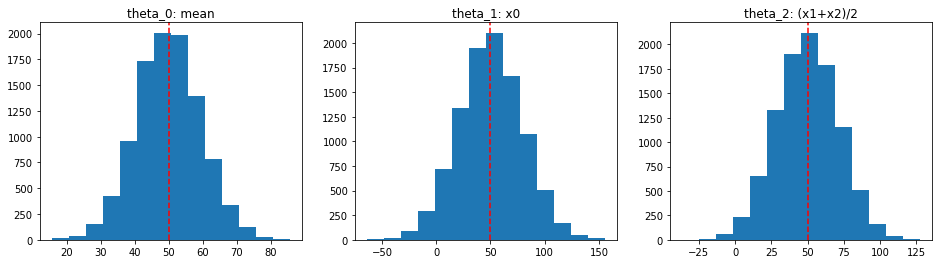

In [8]:
titles = ["theta_0: mean", "theta_1: x0", "theta_2: (x1+x2)/2"]
fig, ax = plt.subplots(1, 3, figsize=(16,4))
for i in range(3):
    ax[i].set_title(titles[i])
    ax[i].hist(theta_lists[i], bins=int(round(1+np.log2(rep))))
    ax[i].axvline(mu, ls="--", color="red")#真の値⇒赤の破線 
plt.show()

期待値を実際に計算すれば分かるが、推定量0~2の期待値は全て母平均(=50)に一致する。</br>
つまり、**推定量0~2は全て"不偏推定量"**である（上のシミュレーションでも、50を中心としたヒストグラムになっている）</br>
推定量1,2のような、推定量として相応しくなさそうなものも不偏推定量になっている

</br>

ちなみに、不偏でない推定量の具体例としては標本分散が挙げられる

In [9]:
var_lists = [[] for i in range(3)]
for i in range(rep):
    X = np.random.normal(mu, dev, N)
    var_lists[0].append(sum(np.square(X-np.mean(X)))/(N-1))#不偏分散
    var_lists[1].append(sum(np.square(X-np.mean(X)))/N)#標本分散

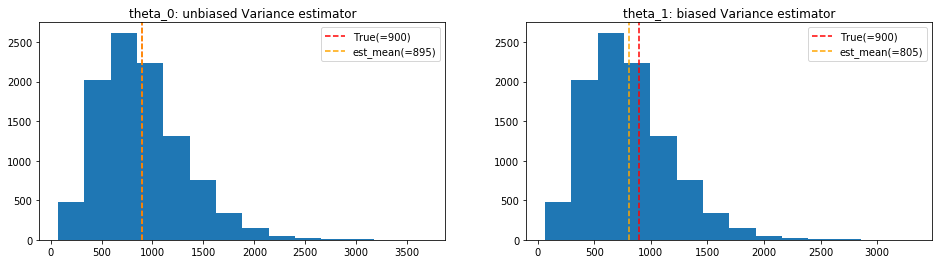

In [10]:
titles_ = ["theta_0: unbiased Variance estimator", "theta_1: biased Variance estimator"]
fig, ax = plt.subplots(1, 2, figsize=(16,4))
for i in range(2):
    ax[i].set_title(titles_[i])
    ax[i].hist(var_lists[i], bins=int(round(1+np.log2(rep))))
    ax[i].axvline(dev**2, ls="--", color="red", label=f"True(={dev**2})") #真の値⇒赤の破線 
    ax[i].axvline(np.mean(var_lists[i]), ls="--", color="orange",
                  label=f"est_mean(={int(np.mean(var_lists[i]))})") #推定値の平均値⇒オレンジの破線
    ax[i].legend(loc="upper right")
plt.show()

結果、標本分散は真の分散を過小評価している（分散をリスクと捉えるような場面では、特に過小評価は望ましくない）。</br>
実際に標本分散の期待値を計算をすると、真の値を(1-1/N)だけ過小評価している。</br>（今回の例では、推定値が真の値の90%くらいになってしまう）</br>
</br>
ただし標本分散は後述の一致推定量であり、また漸近不偏推定量でもあるので、特に間違いというものではない（小標本ならNG）

</br>

### 有効性

推定量の**分散が小さい**ほど、**より有効な**推定量とされる

ヒストグラムを密度で描き直して重ねると、、

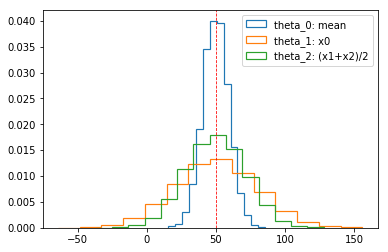

In [11]:
for i in range(3):
    plt.hist(theta_lists[i], bins=int(round(1+np.log2(rep))),
             density=True, histtype='step',
             linewidth=1.2, label=titles[i])
plt.axvline(mu, linestyle='--', color="red", linewidth=0.8)
plt.legend(loc="upper right")
plt.show()

同じ不偏推定量であっても、より有効な推定量はやはり推定量0（全データ点の平均）であった。</br>
推定量0~2の分散を計算すると、確率変数 x の分散（母分散=900）から1/Nのオーダーで分散が小さくなっていくことがわかる

In [12]:
print(f"True Variance = {dev**2}")
print(f"theta_0(var)(N(=10) samples mean estimator) = {np.var(theta_lists[0])}")
print(f"theta_1(var)(1      sample  mean estimator) = {np.var(theta_lists[1])}")
print(f"theta_2(var)(2      samples mean estimator) = {np.var(theta_lists[2])}")

True Variance = 900
theta_0(var)(N(=10) samples mean estimator) = 90.74511876585362
theta_1(var)(1      sample  mean estimator) = 876.38151159165
theta_2(var)(2      samples mean estimator) = 457.22926776119135


</br>

### 一致性

データ点の数が増えるにつれて、推定量が真の値に近づいていく（確率収束するというものらしい）</br>
*θ^ ⇒ θ* * *(N ⇒ ∞)*</br>

N = 10 から、30, 100と取得するデータ点を増やしていく

In [13]:
N_list = [10, 30, 100]
theta_lists = [[[] for i in range(len(N_list))] for i in range(3)]
for i in range(len(N_list)):
    for j in range(rep):
        X = np.random.normal(mu, dev, N_list[i])
        theta_lists[0][i].append(np.mean(X))
        theta_lists[1][i].append(X[0])
        theta_lists[2][i].append((X[1]+X[2])/2)

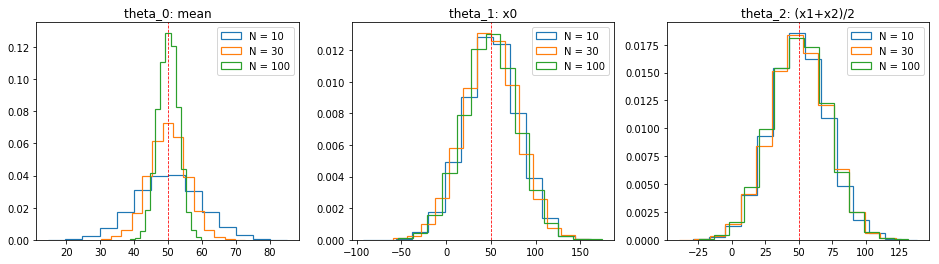

In [14]:
titles = ["theta_0: mean", "theta_1: x0", "theta_2: (x1+x2)/2"]
fig, ax = plt.subplots(1, 3, figsize=(16,4))
for i in range(3):
    ax[i].set_title(titles[i])
    for j in range(len(N_list)):
        ax[i].hist(theta_lists[i][j], bins=int(round(1+np.log2(rep))),
                   density=True, histtype='step',
                   linewidth=1.2, label=f"N = {N_list[j]}")
    ax[i].axvline(mu, ls="--", color="red", linewidth=0.8)#真の値⇒赤の破線 
    ax[i].legend(loc="upper right")
plt.show()

この例は、一致性の良い例ではないかもしれない。</br>
どれも不偏推定量なので、Nが大きくなるほど分散が0に近づく推定量であれば一致推定量である（この例では推定量0のみ）</br>
不偏でない推定量でも、一致性があるものはあるはず（標本分散も一例。漸近不偏性はあるけど）</br>
</br>
推定量1,2は、データ点の数Nの影響を受けないので、一致推定量とはなり得ない。</br>
</br>
一致性が、推定量として望まれる性質の中で最も前提になるものだと思う。（データが増えるほど推定精度が上がる推定量が望ましいに決まっている）</br>
続いて、漸近不偏性がある中で、より分散の小さい推定量が望ましい、はず